In [1]:
# 1.Create a line chart of Total_Marks against StudentID, with labeled axes and a title. Customize colors, line styles, and markers.
# 2.Plot a histogram of Total_Marks using 30 bins; add grid lines and use a customized color
# palette. 
# 3.Generate a scatter plot of Attendance vs Total_Marks, using different markers and colors
# for Gender. 
# 4.Create a grouped bar chart showing average Total_Marks by City and Gender. Annotate
# bars and add a legend. 
# 5.Plot boxplots of Total_Marks categorized by City. Use different colors for each boxplot. 
# 6.Create a multi-plot figure with subplots: a line plot showing average Total_Marks by Age, a
# scatter plot of Attendance vs Total_Marks, and a boxplot by Gender. 
# 7.Plot a pie chart illustrating the proportion of students by Gender. 
# 8.Draw a stacked bar chart representing the count of passing (≥250 marks) and failing
# students for each City. 
# 9.Create a 3D scatter plot visualizing Age, Total_Marks, and Attendance.
# 10.Use annotations to highlight the student with the highest marks on a scatter plot.

In [4]:
!pip install matplotlib

  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------ --------------------------- 2.6/8.1 MB 20.0 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 24.0 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 21.4 MB/s  0:00:00
Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------------------------- 2.3/2.3 MB 21.8 MB/s  0:00:00
Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl (73 kB)
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ----------------------------------- ---- 6.3/7.0 MB 31.5 MB/s eta 0:00:01
   ---------------

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_excel(r"C:\Users\XNovaQ.24\Downloads\student_performance.xlsx")

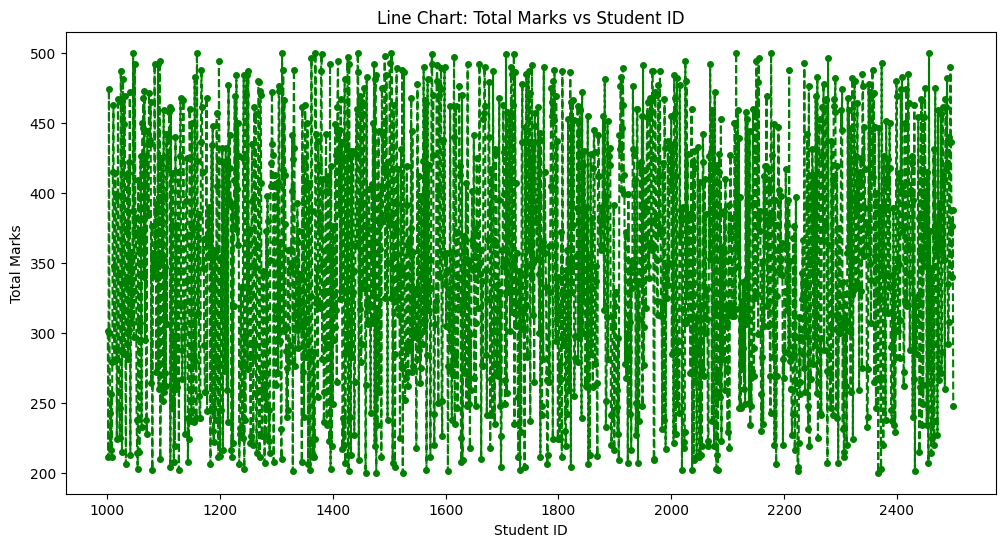

In [18]:
# 1.

plt.figure(figsize=(12,6))
plt.plot(df["StudentID"], df["Total_Marks"], 
         color='green', linestyle='--', marker='o', markersize=4)

plt.xlabel("Student ID")
plt.ylabel("Total Marks")
plt.title("Line Chart: Total Marks vs Student ID")

plt.show()

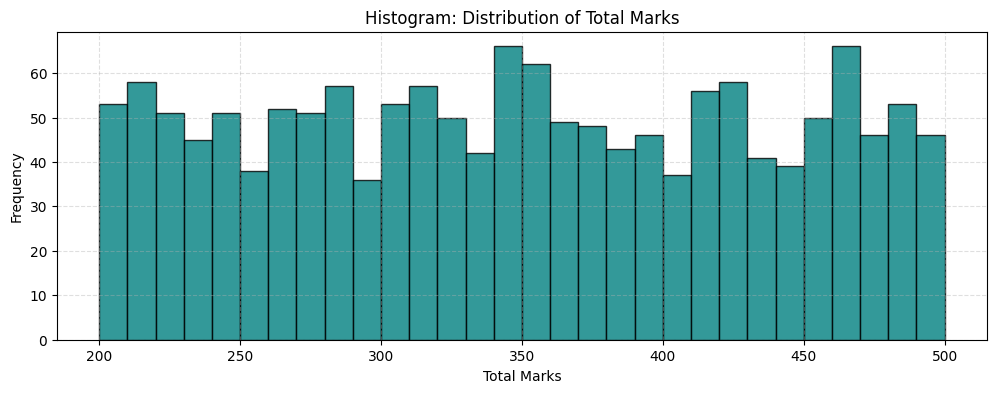

In [21]:
# 2. 

plt.figure(figsize=(12,4))
plt.hist(df["Total_Marks"], bins=30, color='teal', edgecolor='black', alpha=0.8)

plt.grid(True, linestyle='--', alpha=0.4)
plt.xlabel("Total Marks")
plt.ylabel("Frequency")
plt.title("Histogram: Distribution of Total Marks")
plt.show()

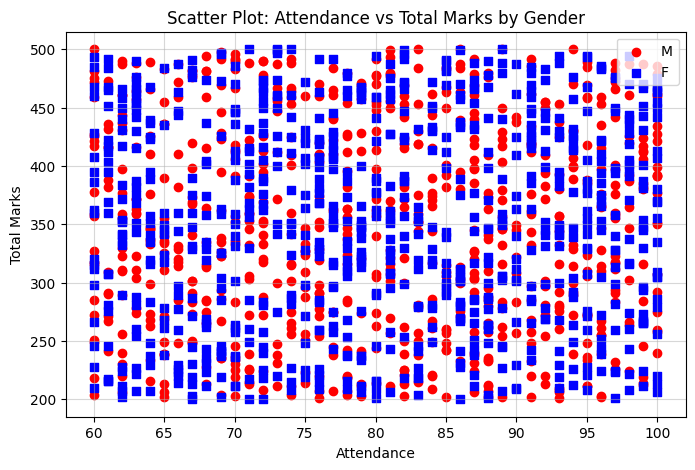

In [26]:
# 3.

plt.figure(figsize=(8,5))

markers = ['o', 's', '^', 'D']
colors = ['red', 'blue', 'green', 'purple']

genders = df["Gender"].unique()

for i, g in enumerate(genders):
    sub = df[df["Gender"] == g]
    plt.scatter(sub["Attendance"], sub["Total_Marks"],
                marker=markers[i], color=colors[i], label=g)

plt.xlabel("Attendance")
plt.ylabel("Total Marks")
plt.title("Scatter Plot: Attendance vs Total Marks by Gender")
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

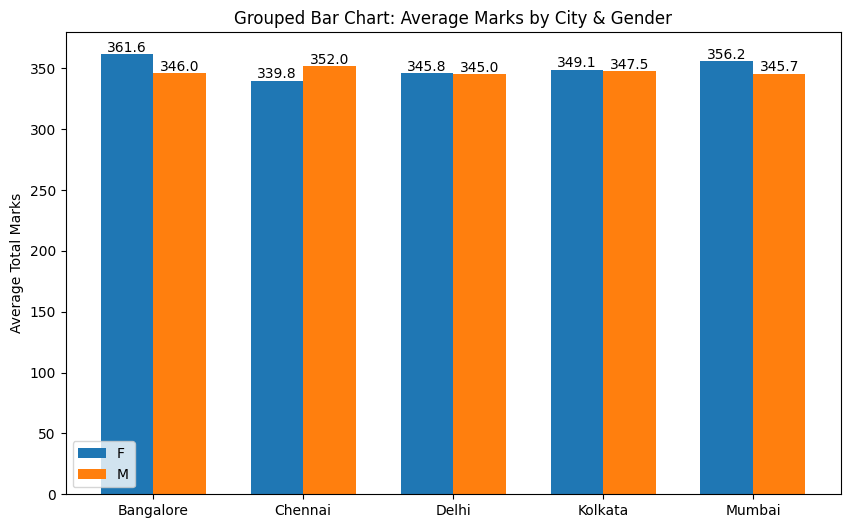

In [27]:
# 4. 

grouped = df.groupby(["City", "Gender"])["Total_Marks"].mean().unstack()

plt.figure(figsize=(10,6))
x = range(len(grouped.index))
width = 0.35

plt.bar([p - width/2 for p in x], grouped.iloc[:,0], width=width, label=grouped.columns[0])
if grouped.shape[1] > 1:
    plt.bar([p + width/2 for p in x], grouped.iloc[:,1], width=width, label=grouped.columns[1])

plt.xticks(x, grouped.index)
plt.ylabel("Average Total Marks")
plt.title("Grouped Bar Chart: Average Marks by City & Gender")
plt.legend()

# Add annotations
for i, city in enumerate(grouped.index):
    for j, gender in enumerate(grouped.columns):
        val = grouped.loc[city, gender]
        plt.text(i + (j-0.5)*width, val + 2, f"{val:.1f}", ha='center')

plt.show()


C:\Users\XNovaQ.24\AppData\Local\Temp\ipykernel_9776\3020836308.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data, patch_artist=True, labels=cities)


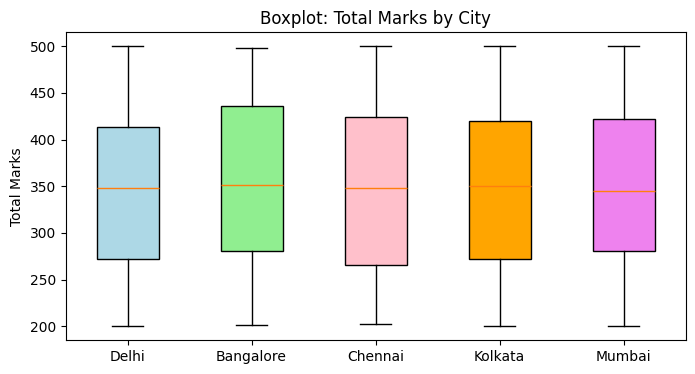

In [38]:
# 5.

plt.figure(figsize=(8,4))

cities = df["City"].unique()
data = [df[df["City"] == c]["Total_Marks"] for c in cities]

box = plt.boxplot(data, patch_artist=True, labels=cities)

colors = ['lightblue', 'lightgreen', 'pink', 'orange', 'violet']
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

plt.title("Boxplot: Total Marks by City")
plt.ylabel("Total Marks")
plt.show()


C:\Users\XNovaQ.24\AppData\Local\Temp\ipykernel_9776\3258185030.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axs[2].boxplot(gender_data, labels=genders)


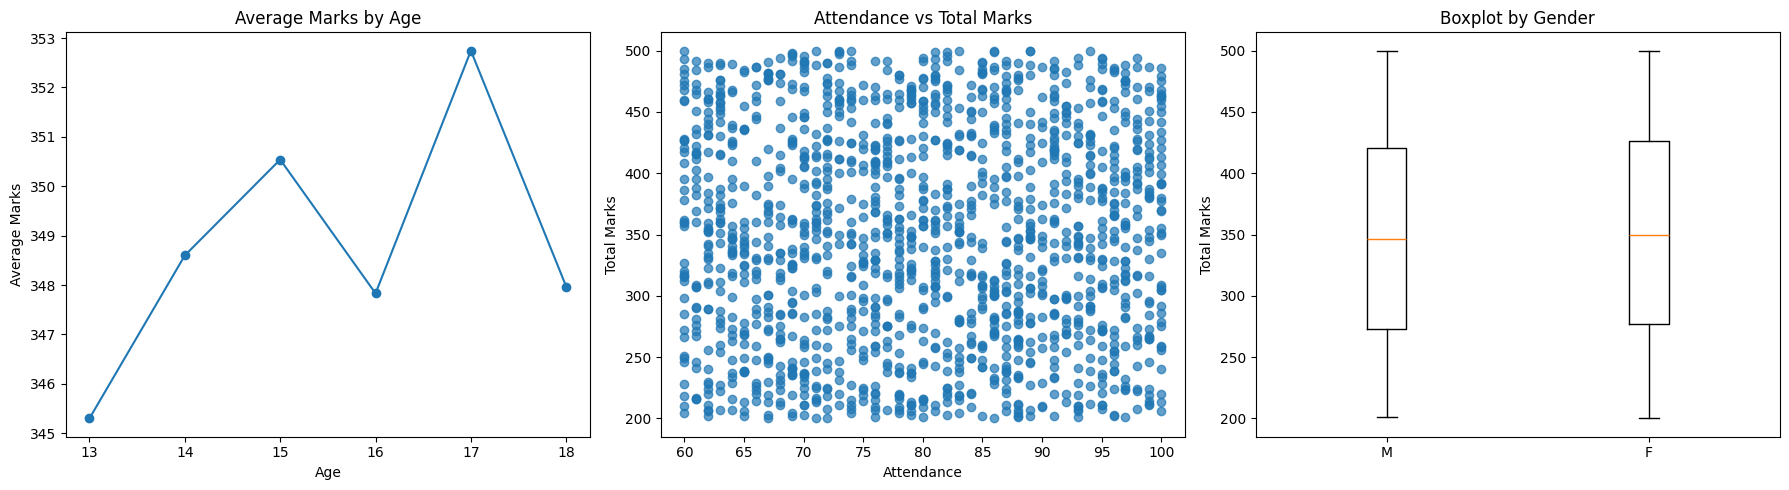

In [29]:
# 6. 

fig, axs = plt.subplots(1, 3, figsize=(18,5))

# Subplot 1 — Avg marks by Age
avg_age = df.groupby("Age")["Total_Marks"].mean()
axs[0].plot(avg_age.index, avg_age.values, marker='o')
axs[0].set_title("Average Marks by Age")
axs[0].set_xlabel("Age")
axs[0].set_ylabel("Average Marks")

# Subplot 2 — Scatter
axs[1].scatter(df["Attendance"], df["Total_Marks"], alpha=0.7)
axs[1].set_title("Attendance vs Total Marks")
axs[1].set_xlabel("Attendance")
axs[1].set_ylabel("Total Marks")

# Subplot 3 — Boxplot by Gender
gender_data = [df[df["Gender"] == g]["Total_Marks"] for g in genders]
axs[2].boxplot(gender_data, labels=genders)
axs[2].set_title("Boxplot by Gender")
axs[2].set_ylabel("Total Marks")

plt.tight_layout()
plt.show()


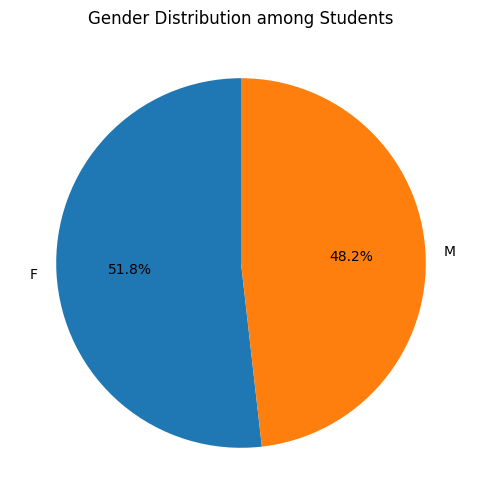

In [30]:
# 7. 

plt.figure(figsize=(6,6))
counts = df["Gender"].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Gender Distribution among Students")
plt.show()


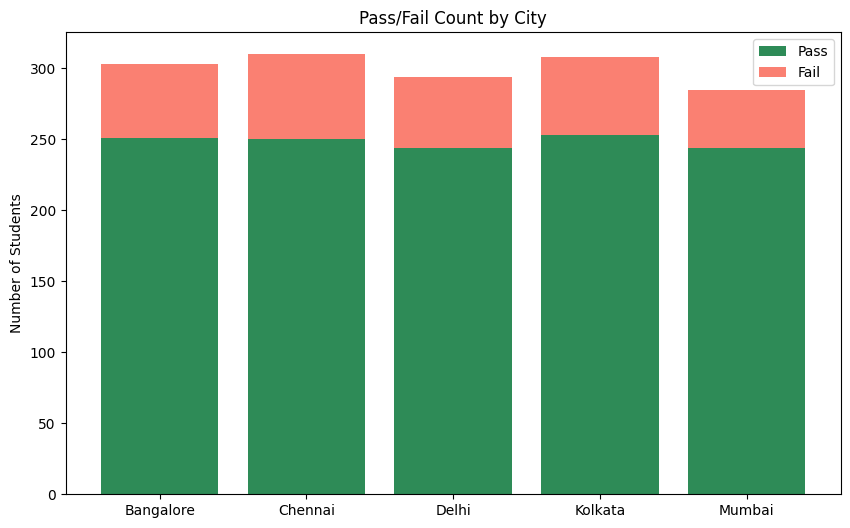

In [34]:
# 8.

df["Result"] = df["Total_Marks"] >= 250
pf = df.groupby(["City", "Result"])["StudentID"].count().unstack().fillna(0)

plt.figure(figsize=(10,6))

plt.bar(pf.index, pf[True], label="Pass", color='seagreen')
plt.bar(pf.index, pf[False], bottom=pf[True], label="Fail", color='salmon')

plt.ylabel("Number of Students")
plt.title("Pass/Fail Count by City")
plt.legend()
plt.show()


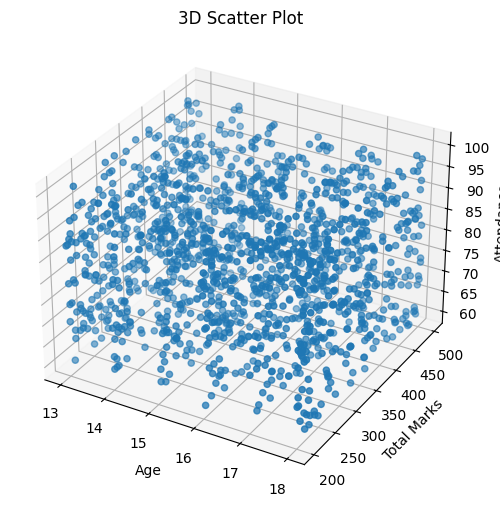

In [32]:
# 9.

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["Age"], df["Total_Marks"], df["Attendance"])

ax.set_xlabel("Age")
ax.set_ylabel("Total Marks")
ax.set_zlabel("Attendance")
ax.set_title("3D Scatter Plot")
plt.show()


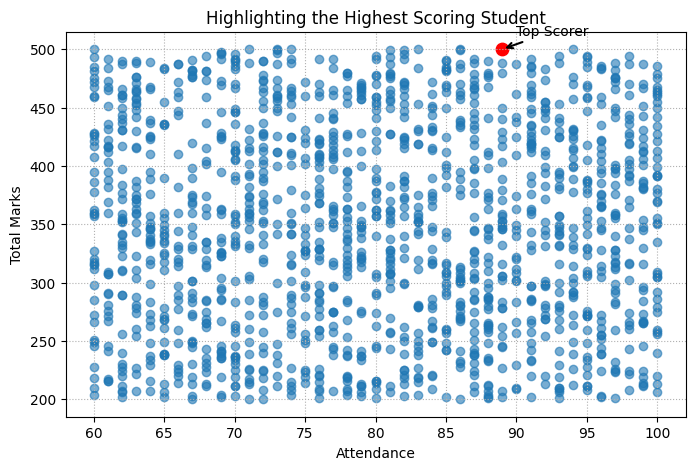

In [35]:
# 10.

top = df.loc[df["Total_Marks"].idxmax()]

plt.figure(figsize=(8,5))
plt.scatter(df["Attendance"], df["Total_Marks"], alpha=0.6)
plt.scatter(top["Attendance"], top["Total_Marks"], color="red", s=80)

plt.annotate("Top Scorer", 
             (top["Attendance"], top["Total_Marks"]),
             textcoords="offset points", xytext=(10,10),
             arrowprops=dict(arrowstyle="->", lw=1.5))

plt.xlabel("Attendance")
plt.ylabel("Total Marks")
plt.title("Highlighting the Highest Scoring Student")
plt.grid(True, linestyle=':')
plt.show()


## SEABORN

In [36]:
# 1.Create a scatter plot of Attendance vs Total_Marks, with points colored by Gender. 
# 2.Plot violin plots to visualize the distribution of Total_Marks across different City categories.
# 3.Generate a heatmap of the correlation matrix of all numerical features, including
# annotations and an appropriate color palette. 
# 4.Draw a countplot to show the number of students in each City, distinguished by Gender
# using hue.
# 5.Use a pairplot with hue and custom markers to explore relationships between numerical
# variables colored by Gender. 
# 6.Create a FacetGrid displaying Total_Marks distributions faceted by Gender and City.
# 7. Plot a jointplot with regression line showing relationship between Attendance and
# Total_Marks. 
# 8.Generate a clustermap for hierarchical clustering based on numerical scores. 
# 9.Create boxenplots for Total_Marks grouped by City.
# 10.Use FacetGrid’s map_dataframe to plot scatterplots with distinct colors for Gender across City.

In [37]:
!pip install seaborn

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

DATA_PATH = r"C:\Users\XNovaQ.24\Downloads\student_performance.xlsx"

# Seaborn styling
sns.set(style="whitegrid", context="notebook", palette="Set2")

# Load
df = pd.read_excel(DATA_PATH)

# Quick head / dtypes / summary
print(df.head())
print(df.dtypes)
print(df.describe(include='all'))

# Ensure categorical types for plotting
for col in ["Gender", "City"]:
    if col in df.columns:
        df[col] = df[col].astype("category")

   StudentID  Age  Total_Marks  Attendance       City Gender
0       1001   16          301          67      Delhi      M
1       1002   17          211          79  Bangalore      M
2       1003   15          474          92    Chennai      F
3       1004   17          300          85  Bangalore      F
4       1005   17          243          98    Chennai      F
StudentID       int64
Age             int64
Total_Marks     int64
Attendance      int64
City           object
Gender         object
dtype: object
          StudentID          Age  Total_Marks   Attendance     City Gender
count   1500.000000  1500.000000  1500.000000  1500.000000     1500   1500
unique          NaN          NaN          NaN          NaN        5      2
top             NaN          NaN          NaN          NaN  Chennai      F
freq            NaN          NaN          NaN          NaN      310    777
mean    1750.500000    15.482667   348.796000    80.152667      NaN    NaN
std      433.157015     1.722695    86

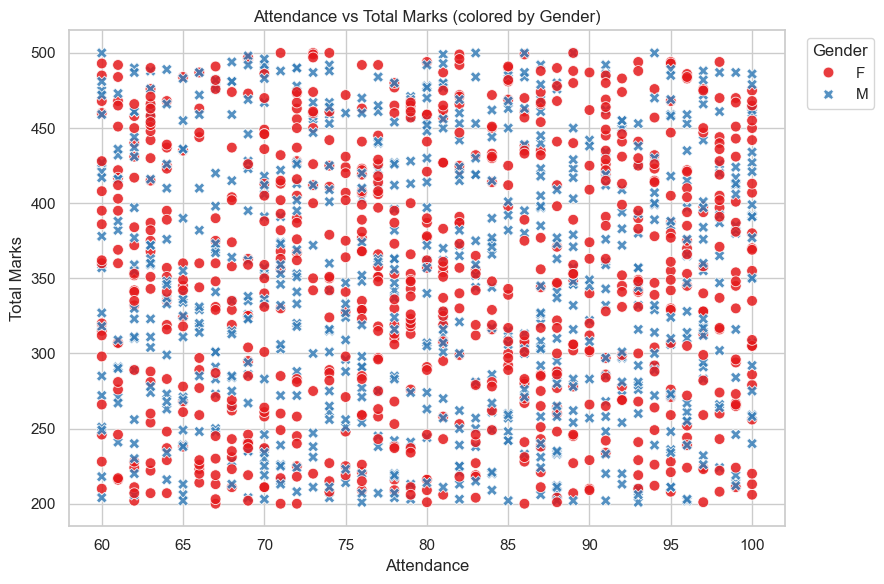

In [45]:
# 1.

plt.figure(figsize=(9,6))
sns.scatterplot(
    data=df,
    x="Attendance",
    y="Total_Marks",
    hue="Gender",
    style="Gender",            # optional: different marker styles per gender
    palette="Set1",
    s=60,
    edgecolor="w",
    alpha=0.85
)
plt.title("Attendance vs Total Marks (colored by Gender)")
plt.xlabel("Attendance")
plt.ylabel("Total Marks")
plt.legend(title="Gender", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

C:\Users\XNovaQ.24\AppData\Local\Temp\ipykernel_9776\2338778407.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


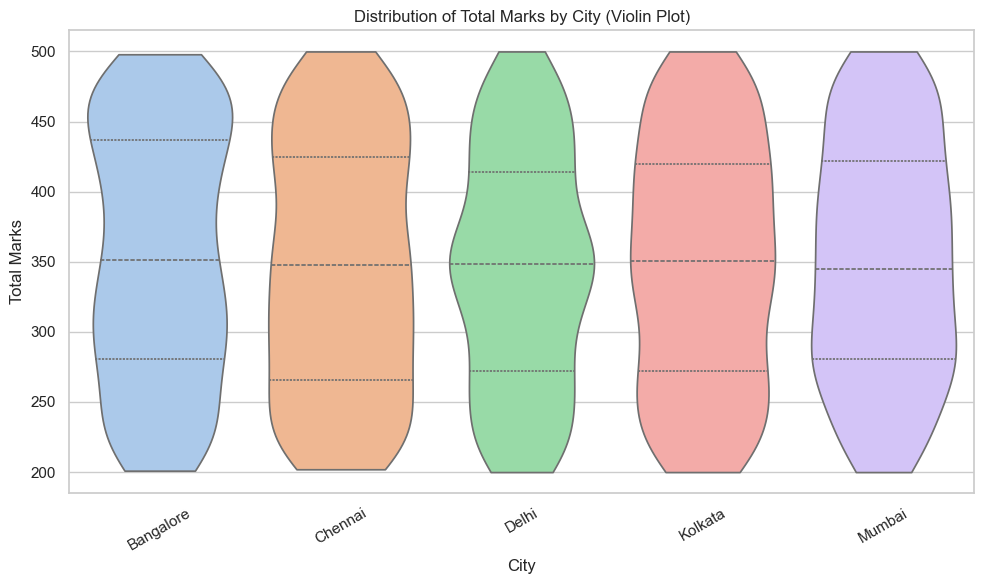

In [46]:
# 2.

plt.figure(figsize=(10,6))
order = df['City'].cat.categories if hasattr(df['City'], 'cat') else df['City'].unique()
sns.violinplot(
    data=df,
    x="City",
    y="Total_Marks",
    order=order,
    inner="quartile",
    palette="pastel",
    cut=0
)
plt.title("Distribution of Total Marks by City (Violin Plot)")
plt.xlabel("City")
plt.ylabel("Total Marks")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

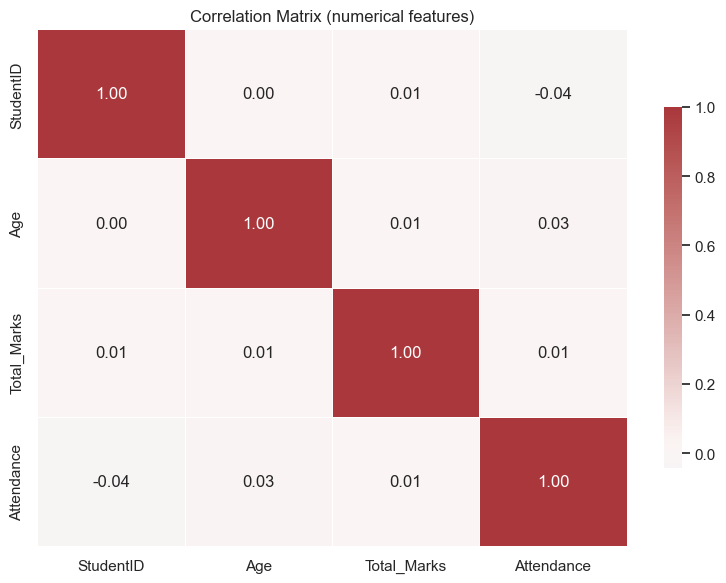

In [47]:
# 3.

numeric = df.select_dtypes(include=[np.number]).copy()
corr = numeric.corr()

plt.figure(figsize=(8,6))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="vlag",
    center=0,
    linewidths=0.5,
    cbar_kws={"shrink":0.7}
)
plt.title("Correlation Matrix (numerical features)")
plt.tight_layout()
plt.show()

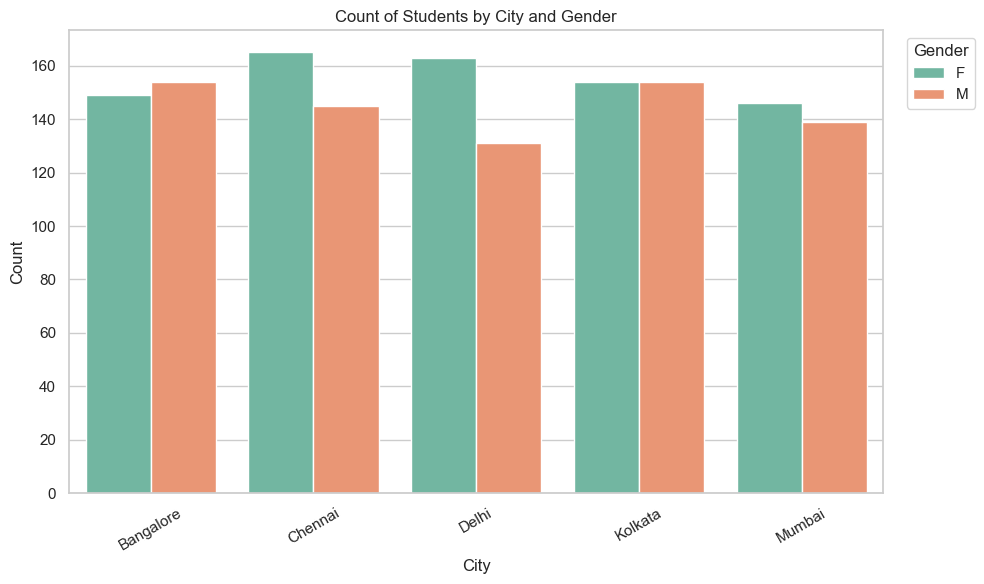

In [48]:
# 4.

plt.figure(figsize=(10,6))
sns.countplot(
    data=df,
    x="City",
    hue="Gender",
    order=order,
    palette="Set2"
)
plt.title("Count of Students by City and Gender")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.legend(title="Gender", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

C:\Users\XNovaQ.24\Documents\Data-Science\Data-Science\dsenv\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\XNovaQ.24\Documents\Data-Science\Data-Science\dsenv\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\XNovaQ.24\Documents\Data-Science\Data-Science\dsenv\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
C:\Users\XNovaQ.24\Documents\Data-Science\Data-Science\dsenv\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 


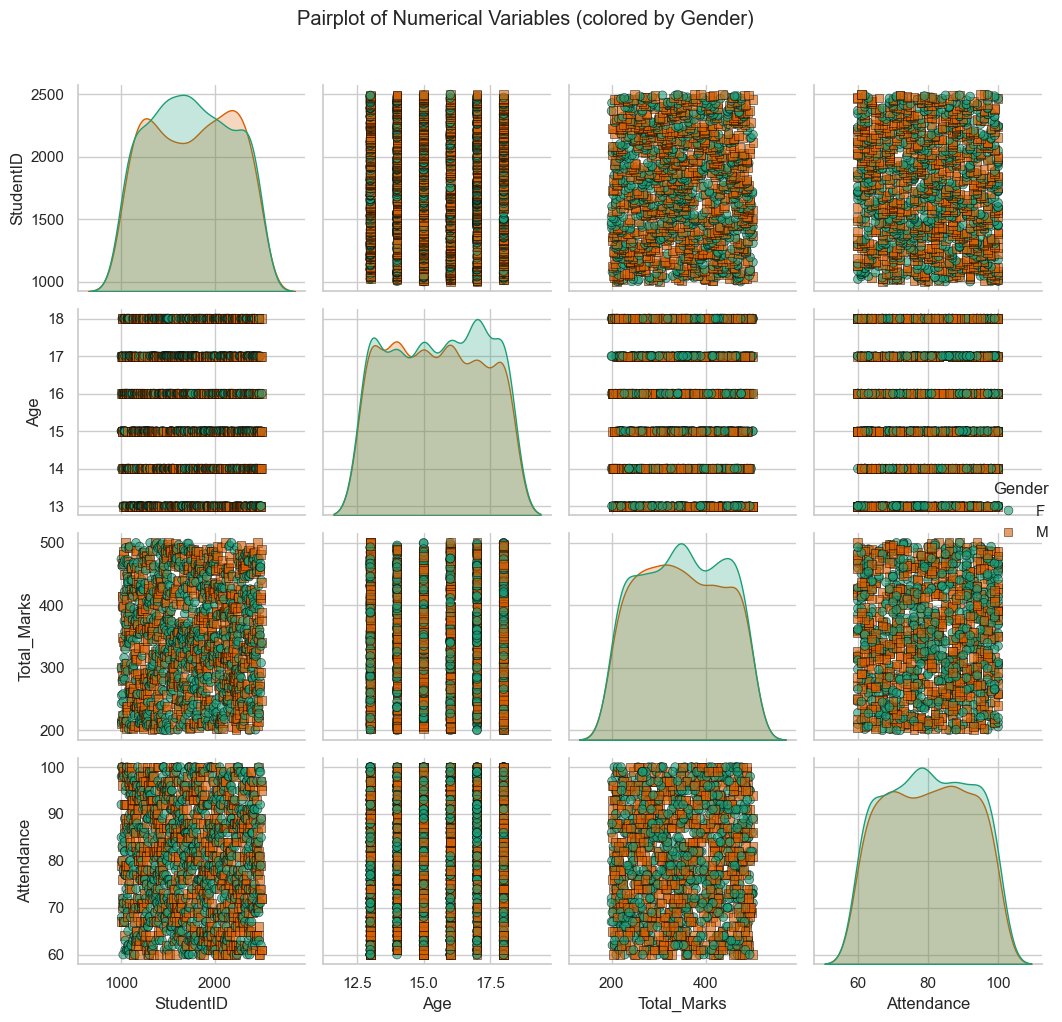

In [49]:
# 5.

numeric_cols = numeric.columns.tolist()
# choose sensible subset if too many numeric columns
if len(numeric_cols) > 4:
    # keep Total_Marks, Attendance, Age and any other numeric
    keep = [c for c in ["Total_Marks", "Attendance", "Age"] if c in numeric_cols]
    other = [c for c in numeric_cols if c not in keep]
    # pick up to 1 more
    if other:
        keep.append(other[0])
    pair_cols = keep
else:
    pair_cols = numeric_cols

# prepare markers based on number of gender categories
genders = df["Gender"].cat.categories if hasattr(df["Gender"], 'cat') else df["Gender"].unique()
base_markers = ['o', 's', '^', 'D', 'P', 'X', '*']
markers = base_markers[:len(genders)]

sns.pairplot(
    df,
    vars=pair_cols,
    hue="Gender",
    markers=markers,
    palette="Dark2",
    corner=False,
    diag_kind="kde",
    plot_kws={'alpha':0.6, 'edgecolor':'k', 's':40},
    diag_kws={'shade':True}
)
plt.suptitle("Pairplot of Numerical Variables (colored by Gender)", y=1.02)
plt.tight_layout()
plt.show()

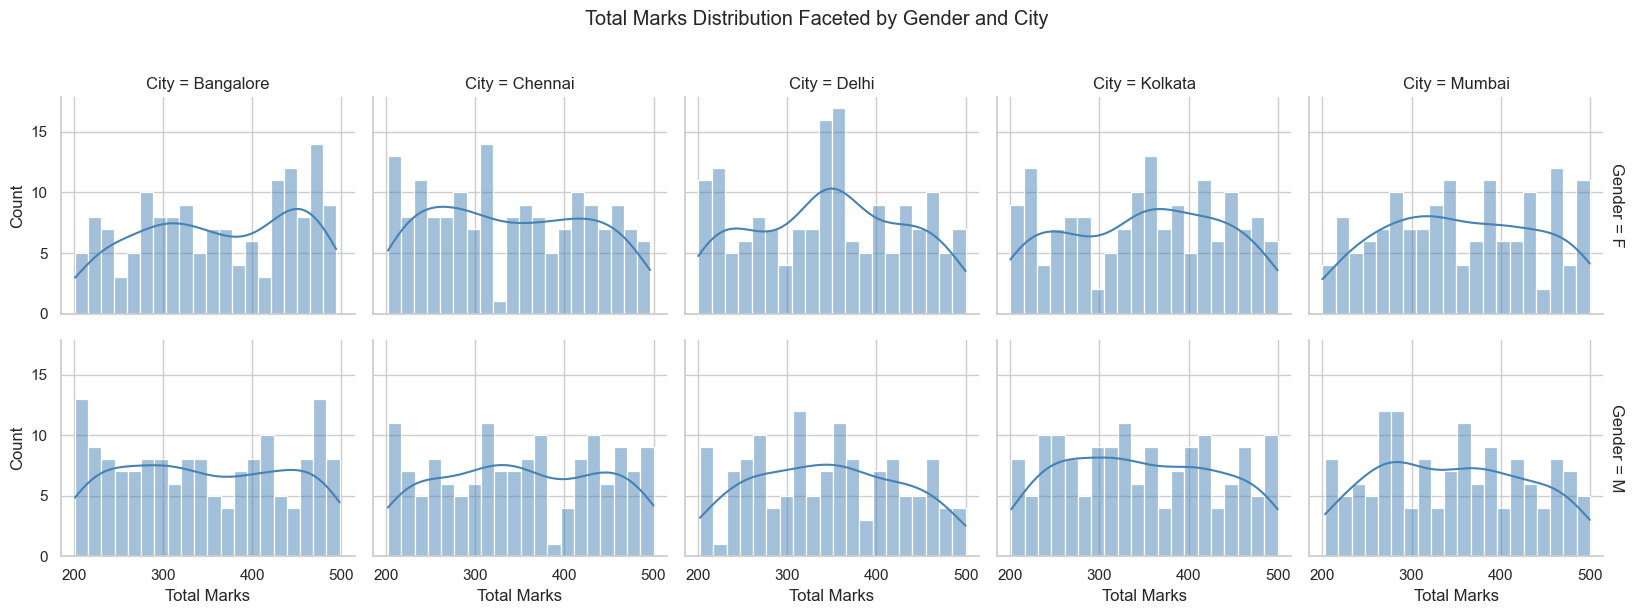

In [55]:
# 6.

g = sns.FacetGrid(df, row="Gender", col="City", margin_titles=True, height=3, aspect=1.1)
g.map(sns.histplot, "Total_Marks", kde=True, bins=20, color="steelblue")
g.set_axis_labels("Total Marks", "Count")
g.fig.suptitle("Total Marks Distribution Faceted by Gender and City", y=1.02)
plt.tight_layout()
plt.show()

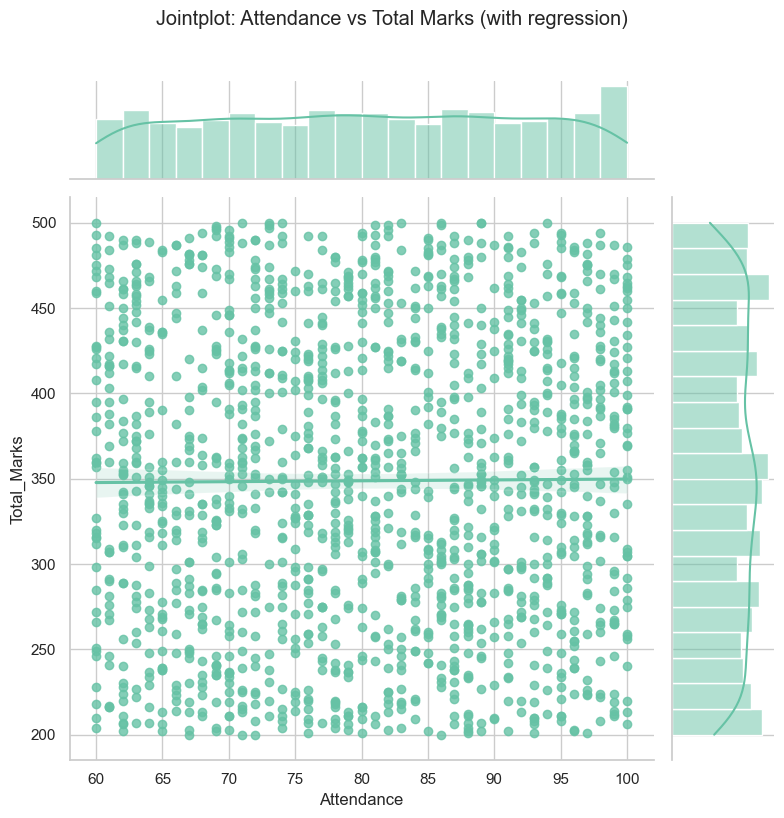

In [57]:
# 7.

jp = sns.jointplot(
    data=df,
    x="Attendance",
    y="Total_Marks",
    kind="reg",
    height=8,
    marginal_kws=dict(bins=20, fill=True)
)
jp.fig.suptitle("Jointplot: Attendance vs Total Marks (with regression)", y=1.02)
plt.tight_layout()
plt.show()

In [65]:
!pip install scikit-learn

   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   --------- ------------------------------ 2.1/8.7 MB 29.3 MB/s eta 0:00:01
   --------- ------------------------------ 2.1/8.7 MB 29.3 MB/s eta 0:00:01
   ---------------------------------------  8.7/8.7 MB 15.1 MB/s eta 0:00:01
   ---------------------------------------- 8.7/8.7 MB 14.1 MB/s  0:00:00
   ---------------------------------------- 0.0/38.5 MB ? eta -:--:--
   -------- ------------------------------- 7.9/38.5 MB 37.9 MB/s eta 0:00:01
   ----------------- ---------------------- 16.5/38.5 MB 39.6 MB/s eta 0:00:01
   --------------------------- ------------ 26.7/38.5 MB 42.7 MB/s eta 0:00:01
   -------------------------------------- - 37.5/38.5 MB 45.1 MB/s eta 0:00:01
   ---------------------------------------- 38.5/38.5 MB 37.4 MB/s  0:00:01

   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [scipy]
   ---------- ----------------------------- 1/4 [sci

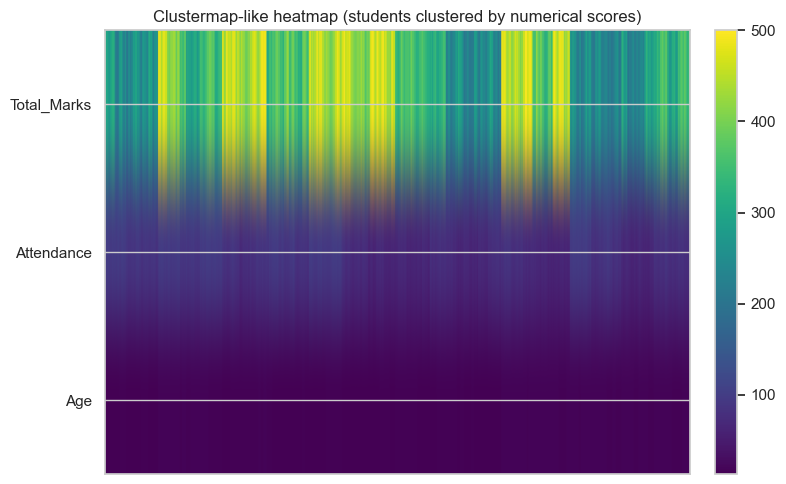

In [73]:
# 8.

from scipy.cluster.hierarchy import linkage, leaves_list

data_for_cluster = df[['Total_Marks', 'Attendance', 'Age']].copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled = scaler.fit_transform(data_for_cluster)
link = linkage(scaled, method='ward')
order = leaves_list(link)
ordered = data_for_cluster.iloc[order]
fig, ax = plt.subplots(figsize=(8,5))
cax = ax.imshow(ordered.T, aspect='auto', cmap='viridis')
ax.set_yticks(range(ordered.shape[1]))
ax.set_yticklabels(ordered.columns)
ax.set_xticks([])
ax.set_title('Clustermap-like heatmap (students clustered by numerical scores)')
fig.colorbar(cax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

C:\Users\XNovaQ.24\AppData\Local\Temp\ipykernel_9776\3485422825.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(


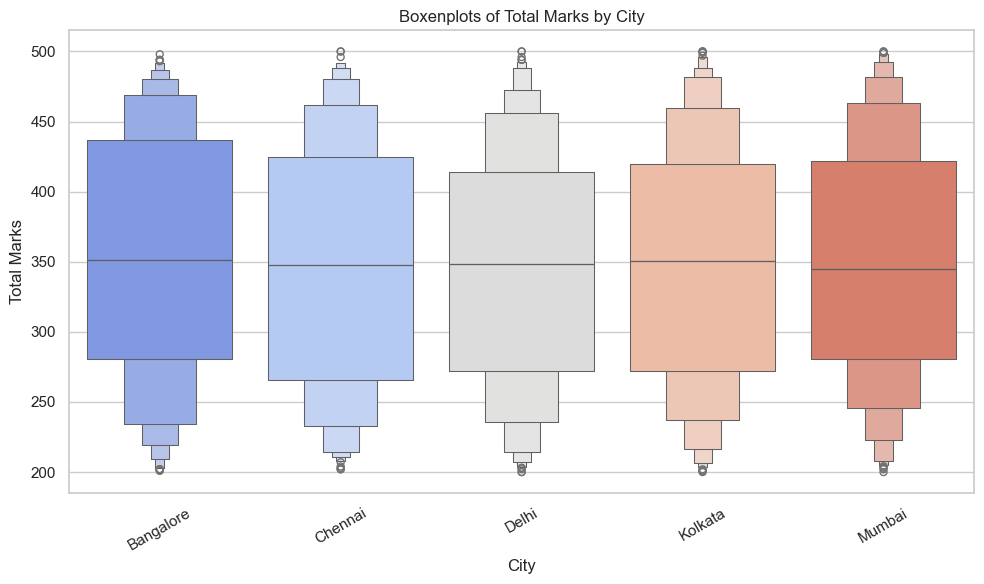

In [69]:
# 9. 

plt.figure(figsize=(10,6))
sns.boxenplot(
    data=df,
    x="City",
    y="Total_Marks",
    order=order,
    palette="coolwarm"
)
plt.title("Boxenplots of Total Marks by City")
plt.xlabel("City")
plt.ylabel("Total Marks")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

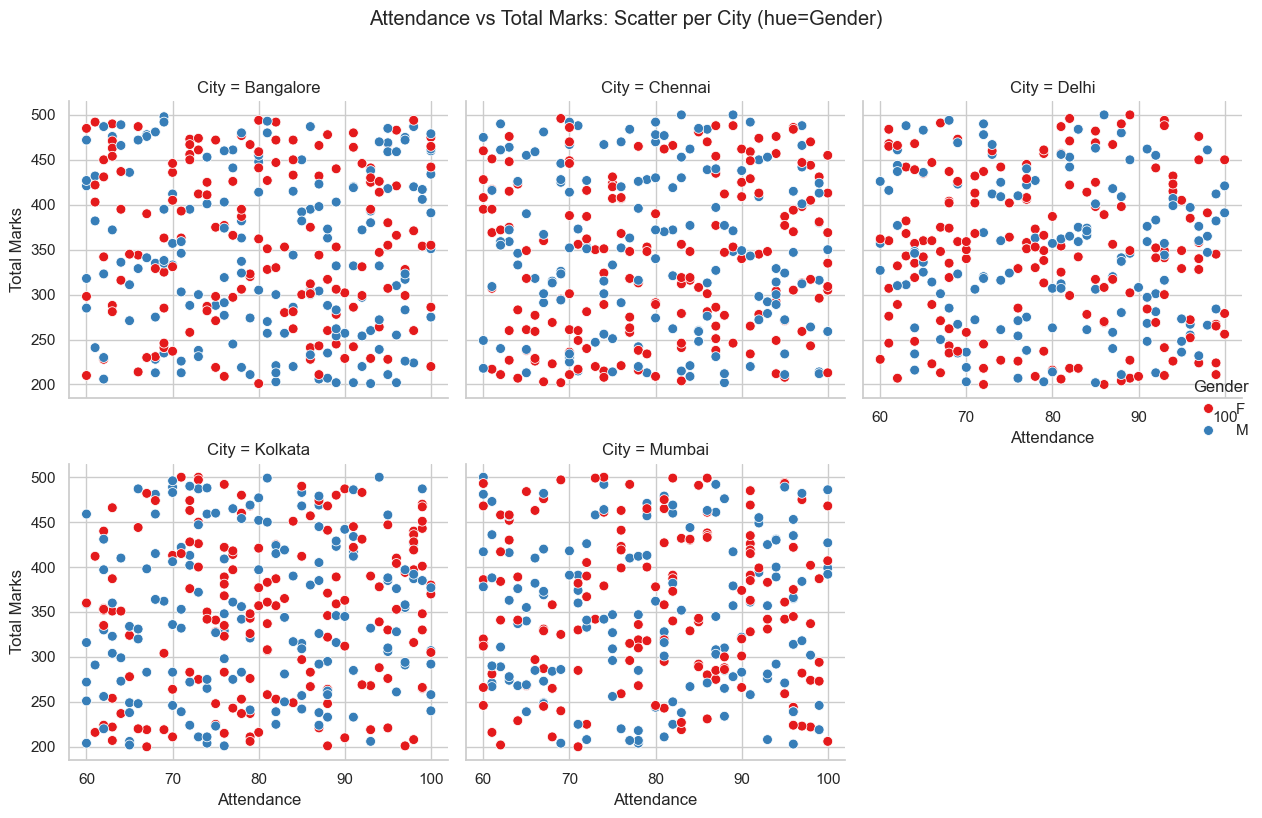

In [75]:
# 10.

cities = df['City'].cat.categories if hasattr(df['City'], 'cat') else df['City'].unique()
g = sns.FacetGrid(df, col="City", col_wrap=3, height=4, sharex=True, sharey=True)
# use map_dataframe with sns.scatterplot to allow hue inside each facet
def draw_scatter(data, color, **kws):
    sns.scatterplot(
        data=data,
        x="Attendance",
        y="Total_Marks",
        hue="Gender",
        palette="Set1",
        s=50,
        edgecolor="w",
        **kws
    )
g.map_dataframe(draw_scatter)
g.set_axis_labels("Attendance", "Total Marks")
g.add_legend(title="Gender", adjust_subtitles=True)
g.fig.suptitle("Attendance vs Total Marks: Scatter per City (hue=Gender)", y=1.02)
plt.tight_layout()
plt.show()